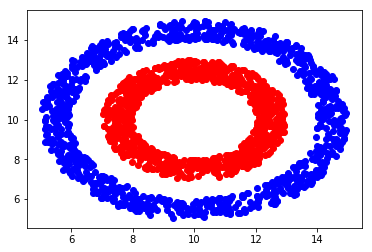

In [9]:
import mxnet as mx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

center = mx.nd.array((10.0, 10.0))

num_samples = 1000

r1 = mx.nd.random_uniform(4.0, 5.0, shape = (num_samples, ))
theta1 = mx.nd.random_uniform(0, 2 * math.pi, shape = (num_samples, ))
x11 = r1 * mx.nd.cos(theta1) + center[0]
x12 = r1 * mx.nd.sin(theta1) + center[1]
data1 = mx.nd.stack(x11, x12, mx.nd.sqrt(x11**2 + x12**2)).T
label1 = mx.nd.zeros((num_samples))

r2 = mx.nd.random_uniform(2.0, 3.0, shape = (num_samples, ))
theta2 = mx.nd.random_uniform(0, 2 * math.pi, shape = (num_samples, ))
x21 = r2 * mx.nd.cos(theta2) + center[0]
x22 = r2 * mx.nd.sin(theta2) + center[1]
data2 = mx.nd.stack(x21, x22, x21 * x22).T
label2 = mx.nd.ones((num_samples))

plt.scatter(data1[:, 0].asnumpy(), data1[:, 1].asnumpy(), color = 'b')
plt.scatter(data2[:, 0].asnumpy(), data2[:, 1].asnumpy(), color = 'r')
plt.show()

In [10]:
data = mx.nd.concat(data1, data2, dim = 0)
label = mx.nd.concat(label1, label2, dim = 0)

train_ratio = 1
train_size = int(train_ratio * data.shape[0])
#train_data, test_data = data[:train_size], data[train_size:]
#train_label, test_label = label[:train_size], label[train_size:]
train_iter = mx.io.NDArrayIter(data = data, label = label, shuffle = True, batch_size = 64)
#test_iter = mx.io.NDArrayIter(data = test_data, label = test_label, shuffle = False, batch_size = 32)

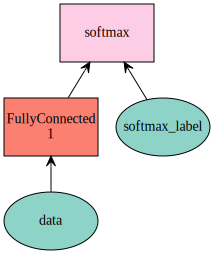

In [20]:
net = mx.sym.Variable('data')
net = mx.sym.FullyConnected(net, name='fc1', num_hidden=1)
net = mx.sym.LinearRegressionOutput(net, name='softmax')
mx.viz.plot_network(net)

In [27]:
model = mx.mod.Module(context = mx.gpu(), symbol = net, data_names = ['data'], label_names = ['softmax_label'])
model.bind(data_shapes=train_iter.provide_data, label_shapes = train_iter.provide_label)
model.init_params(initializer=mx.initializer.Uniform(scale = 0.1))
model.init_optimizer(optimizer='sgd', optimizer_params={'learning_rate' : 0.00001, 'momentum' : 0.9})

In [28]:
metric = mx.metric.Accuracy()

epochs = 10
for epoch in range(epochs):
    train_iter.reset()
    metric.reset()
    for batch in train_iter:
        model.forward(batch, is_train=True)       # compute predictions
        predictions = model.get_outputs()[0] > 0.5 # convert to label
        metric.update(preds=predictions, labels=batch.label[0]) # accumulate prediction accuracy
        model.backward()                          # compute gradients
        model.update()                            # update parameters
    print('Epoch %d, Training %s' % (epoch, metric.get()))

Epoch 0, Training ('accuracy', 0.732421875)
Epoch 1, Training ('accuracy', 0.9453125)
Epoch 2, Training ('accuracy', 0.99658203125)
Epoch 3, Training ('accuracy', 1.0)
Epoch 4, Training ('accuracy', 1.0)
Epoch 5, Training ('accuracy', 1.0)
Epoch 6, Training ('accuracy', 1.0)
Epoch 7, Training ('accuracy', 1.0)
Epoch 8, Training ('accuracy', 1.0)
Epoch 9, Training ('accuracy', 1.0)
